Accuracy: 0.9924744820356339
Precision: 0.6181818181818182
Recall: 0.0819277108433735
F1 Score: 0.14468085106382977
ROC AUC Score: 0.6240277235784416


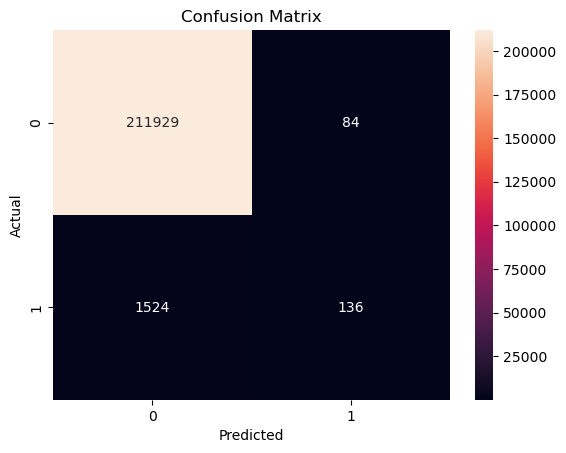

In [ ]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load the actual files (use your local paths in VS Code)
users = pd.read_csv(r"C:\Users\shanz\OneDrive\Documents\Desktop\FinCRime\users.csv")
transactions = pd.read_csv(r"C:\Users\shanz\OneDrive\Documents\Desktop\FinCRime\transactions.csv")
fraudsters = pd.read_csv(r"C:\Users\shanz\OneDrive\Documents\Desktop\FinCRime\fraudsters.csv")

# STEP 3: Merge users into transactions
# Rename for consistent merging
users.rename(columns={'ID': 'USER_ID'}, inplace=True)
transactions = transactions.merge(users, on='USER_ID', how='left')

# Label fraud
transactions['is_fraud'] = transactions['USER_ID'].isin(fraudsters['USER_ID']).astype(int)

# STEP 4: Feature Engineering (no timestamp available in these files, so use what you have)
# Drop identifiers and non-numeric columns
X = transactions.drop(columns=['ID', 'USER_ID', 'CREATED_DATE', 'is_fraud'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Use only numeric columns
y = transactions['is_fraud']

# STEP 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# STEP 7: Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# STEP 8: Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# STEP 9: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
 
# STEP 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

